In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "none" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);


<IPython.core.display.Javascript object>

# Wprowadzenie


Szanowni Państwo, chcielibyśmy przedstawić naszą pracę na temat różnych modeli demograficznych. Omówimy, jak odpowiednio dobrać model w zależności, jakie społeczeństwo bedziemy analizować. Pokażemy również modele uwzględniające imigrację, najpierw w okrojony, a później w dokładniejszy sposób. Warto pamiętać, że nikt nie jest w stanie zrobić idealnej prognozy, zwłaszcza na długi okres czasu. Jednakże, posługując się odpowiednimi modelami, można na przykład optymalizować wydatki państwa lub dostosowywać politykę wewnętrzną, jeżeli na przykład, jest zbyt duża dzietność. Warto tutaj wspomnieć o Chinach, które w ubiegłym dziesięcioleciu w końcu odeszły od nakazu posiadania maksymalnie jednego dziecka, jest to jednak kraj słynący z radykalnych posunięć.


## Modele demograficzne


**Skupimy się konkretnie na trzech modelach:**
1. Wykładniczy
2. Wykładniczy z trzema grupami wiekowymi
3. Logistyczny
    

## Zastosowania modeli


Pokażemy różne scenariusze, dla których te modele okazują się skuteczne. Główną wytyczną co do wyboru modelu jest sytuacja geopolityczna panująca w badanym regionie. Aktualnie, rozwinięte kraje Europy Zachodniej mogą wykorzystywać szczegółowe modele demograficzne w celu ustalenia, które regiony mogą przyjąć określone ilości imigrantów.


**Przykłady historyczne**


Zazwyczaj największy wzrost populacji występuje w krajach, gdzie w krótkiej chwili gwałtownie wzrósł poziom życia. Na przykład, po zakończeniu II Wojny Światowej, w wielu krajach populacja podwoiła się w ciągu 20 - 30 lat. 
Wtedy do przewidywania liczby ludności najlepiej posłużyć się modelem wykładniczym, który omówimy jako pierwszy.


**Uwaga!** 


Po uruchomieniu kodu, wykres przedstawia populację zmierzoną w sposób numeryczny z krokiem czasowym $dt = 0.001$ roku oraz zmierzoną w sposób analityczny.

Poniżej, znajduje się wykres błędu w zależności, ile wynosi 1 krok czasowy.




# Populacja Delhi w latach 1950 - 2000


## Model wykładniczy zapisujemy równaniem różniczkowym, którego rozwiązaniem zajmiemy się poniżej:



1. **Równanie różniczkowe opisujące wzrost populacji:**
   
   \begin{equation}
   \frac{dP}{dt} = r \cdot P
   \end{equation}

2. **Rozdzielenie zmiennych:**
   
   \begin{equation}
   \frac{1}{P} dP = r dt
   \end{equation}

3. **Scałkowanie obu stron równania:**
   
   \begin{equation}
   \int \frac{1}{P} dP = \int r dt
   \end{equation}

4. **Obliczenie całki:**
   
   \begin{equation}
   \ln |P| = rt + C
   \end{equation}
   
   gdzie  $C$  jest stałą całkowania
   


5. **Opuszczenie wartości bezwzględnej:**

   
   \begin{equation}
   \ln (P) = rt + C
   \end{equation}

6. **Rozwiązanie dla  P(t)  z wykorzystaniem własności logarytmu naturalnego, która mówi, że  $ \ln(e^x) = x $ :**
   
   \begin{equation}
   P(t) = e^{rt + C}
   \end{equation}
 



7. **Ostateczne rozwiązanie ogólne:**
  
  \begin{equation}
   P(t) = C e^{rt}
   \end{equation}
   
   
8. **Znalezienie stałej C**   


Wiemy, że populacja początkowa, czyli $P_0$, wynosi 1.4 miliona ludzi, podstawiając więc $t = 0$ w równaniu ogólnym, wychodzi, że $C = P_0$, czyli 1.4 miliona.


Poniżej prezentujemy symulację zastosowania modelu wykładniczego do badania liczby ludności miasta Delhi.

## Dane

Dane o średnim współczynniku wzrostu w tych latach oraz populacji początkowej pochodzą ze strony: 

https://worldpopulationreview.com/world-cities/delhi-population



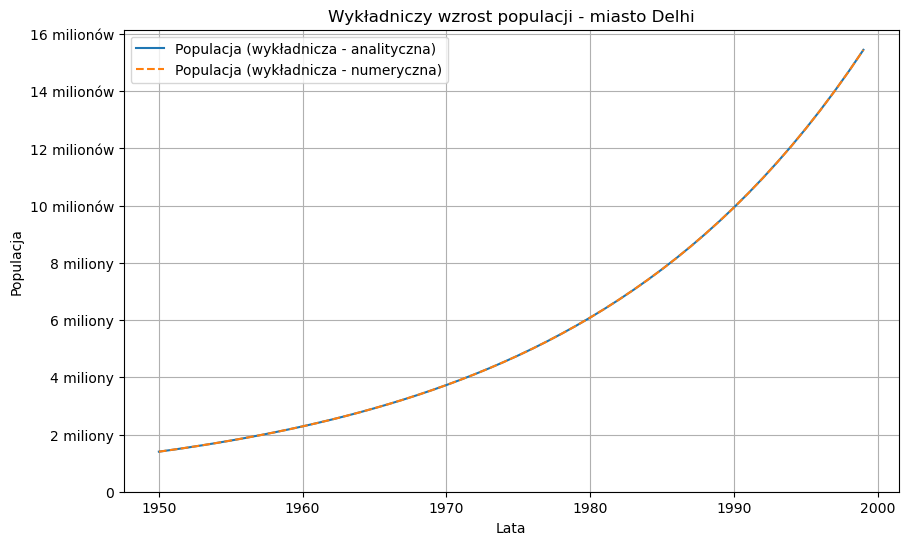

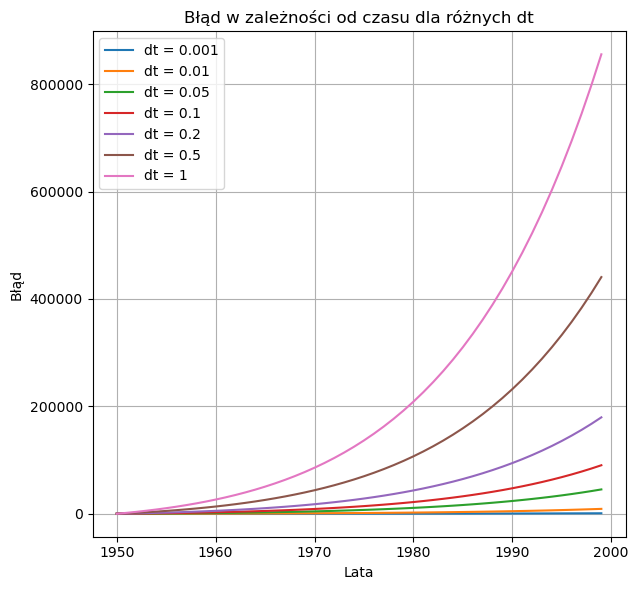

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def exponential_growth_analytical(P0, r, t):
    """
    Funkcja oblicza rozwiązanie modelu wykładniczego przy użyciu rozwiązania analitycznego.
    
    Parametry:
    - P0: Początkowa wartość cechy
    - r: Stopa przyrostu (lub spadku)
    - dt: Krok czasowy
    
    Zwraca:
    - Wartości modelu w danym punkcie czasowym
    """
    return P0 * np.exp(r * t)


def exponential_growth_numerical(P0, r, dt, time):
    """
    Funkcja oblicza numeryczne rozwiązanie modelu wykładniczego przy użyciu metody Eulera.
    
    Parametry:
    - P0: Początkowa wartość cechy
    - r: Stopa przyrostu (lub spadku)
    - dt: Krok czasowy
    - time: Zakres czasu
    
    Zwraca:
    - Wartości rozwiązania numerycznego w każdym punkcie czasowym
    """
    steps_count = int(time / dt) + 1
    results = np.zeros(steps_count)
    
    # Warunki początkowe
    results[0] = P0
    
    # Metoda Eulera
    for step in range(1, steps_count):
        results[step] = results[step - 1] + r * results[step - 1] * dt
    
    return results

# Parametry początkowe
P0 = 1400000  # Początkowa liczba ludności
r = 0.049   # stała roczna stopa wzrostu populacji 
dt = 0.001  # krok czasowy 

# Zakres czasowy
years = np.arange(1950, 2000)  # od 0 do 50 lat włącznie

# Obliczamy populację dla każdego roku (rozwiązanie analityczne)
population = np.array([exponential_growth_analytical(P0, r, i) for i in range(len(years))])

# Obliczamy populację w każdym kolejnym roku (rozwiązanie numeryczne)
population_numerical = exponential_growth_numerical(P0, r, dt, len(years))
population_num_for_plot = []
for i in range(len(years)):
    population_num_for_plot.append(population_numerical[i*int(1/dt)])

# Rysujemy wykres
plt.figure(figsize=(10, 6))
plt.plot(years, population, label='Populacja (wykładnicza - analityczna)')
plt.plot(years, population_num_for_plot, label='Populacja (wykładnicza - numeryczna)', linestyle='dashed')  # use [:-1] to match lengths
plt.title('Wykładniczy wzrost populacji - miasto Delhi')
plt.xlabel('Lata')
plt.ylabel('Populacja')
plt.yticks([0, 2*10**6, 4*10**6, 6*10**6, 8*10**6, 10*10**6, 12*10**6, 14*10**6, 16*10**6], 
           ['0', '2 miliony', '4 miliony', '6 miliony', '8 miliony', '10 milionów', '12 milionów', '14 milionów', '16 milionów'])

plt.legend()
plt.grid(True)
plt.show()

dt_values = [0.001, 0.01,0.05, 0.1,0.2,0.5,1]  # różne wartości kroku czasowego

# Inicjalizacja danych
errors = []

# Obliczenia dla różnych wartości dt
for dt in dt_values:
    population_numerical = exponential_growth_numerical(P0, r, dt, len(years))
    error_values = []
    
    for i in range(len(years)):
        # Obliczanie błędu
        error = np.abs(population[i] - population_numerical[i*int(1/dt)])
        error_values.append(error)
    
    # Zapisanie wartości błędu i tangensa
    errors.append(error_values)


# Rysujemy wykresy
plt.figure(figsize=(12, 6))

# Wykres błędu w zależności od czasu dla różnych dt
plt.subplot(1, 2, 1)
for i, dt in enumerate(dt_values):
    plt.plot(years, errors[i], label=f'dt = {dt}')
plt.title('Błąd w zależności od czasu dla różnych dt')
plt.xlabel('Lata')
plt.ylabel('Błąd')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Przejdźmy teraz do następnej części naszej pracy


## Model trzech grup wiekowych


Przeprowadziliśmy symulację zmiany ludności miasta o populacji i współczynnikach typowego kraju Unii Europejskiej mierzącego się z migracją. Jest ona uwzględniona poprzez duży współczynnik urodzeń (w tej symulacji przybycie dziecka również traktujemy jako urodzenie) i przyspieszony współczynnik transferu dzieci do grupy dorosłych. Ten punkt nie jest jeszcze oparty na prawdziwych danych, jest to dopiero wprowadzenie do korzystania z modelu, na którym skupiliśmy najwięcej uwagi w tym projekcie.


## Migracja w modelach demograficznych

Długoterminowo ciężko jest nawet oszacować liczbę migrantów dołączających do pewnego społeczeństwa. Można wspierać się pewnymi trendami i decyzjami polityków tego regionu, głównie dotyczących zasiłków socjalnych. Problemem jest również potencjalna deportacja lub utrata statusu uchodźcy, co utrudnia urzędom statystycznym prowadzenie badań. Występują liczne przypadki, w których ludzie otrzymują obywatelstwo i osiedlają się na stałe na miejscu, do którego przybyli, ale fale nielegalnych przybyszy znacznie utrudniają tworzenie różnego rodzaju predykcji liczby ludności.


## Współczynniki występujące w modelu

Urzędy publikują dosyć dokładne dane co do przyrostu naturalnego, są to bardzo przydatne informacje nie tylko dla statystyków, ale również dla ludzi z wielu branż, rozważających otworzenie działalności gospodarczej.

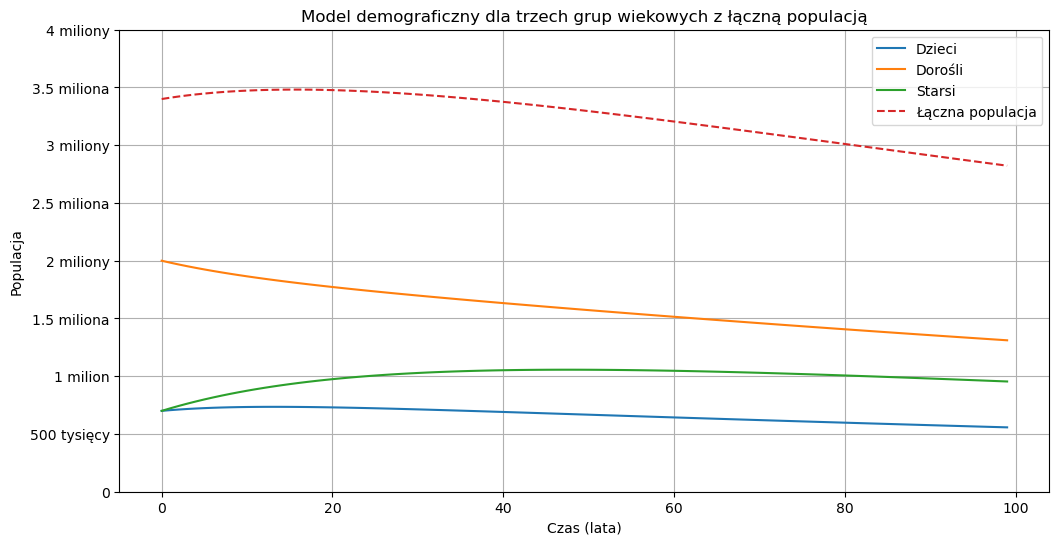

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Stałe modelu
b = 25 / 1000  # współczynnik urodzeń na 1000 osób rocznie
t_CA = 1 / 16  # współczynnik transferu dzieci do grupy dorosłych
t_AS = 1 / 43  # współczynnik transferu dorosłych do grupy starszych
d_A = 0.007     # współczynnik śmiertelności dla dorosłych
d_S = 0.035    # współczynnik śmiertelności dla starszych

# Początkowe wartości populacji
C = 0.7*10**6  # dzieci
A = 2*10**6  # dorośli
S = 0.7*10**6  # starsi

# Okres modelowania i krok czasowy
years = np.arange(0, 100, 1)  # 100 lat
dt = 1  # krok czasowy - 1 rok

# Listy do przechowywania wyników
C_values = [C]
A_values = [A]
S_values = [S]

# Obliczenia modelu
for _ in years[1:]:
    new_C = C + (b * A - t_CA * C) * dt
    new_A = A + (t_CA * C - t_AS * A - d_A * A) * dt
    new_S = S + (t_AS * A - d_S * S) * dt

    # Aktualizacja wartości na kolejny rok
    C, A, S = new_C, new_A, new_S

    # Dodawanie aktualnych wartości do list
    C_values.append(C)
    A_values.append(A)
    S_values.append(S)

# Obliczenie łącznej populacji
total_population = np.array(C_values) + np.array(A_values) + np.array(S_values)

# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.plot(years, C_values, label='Dzieci', color='tab:blue')
plt.plot(years, A_values, label='Dorośli', color='tab:orange')
plt.plot(years, S_values, label='Starsi', color='tab:green')
plt.plot(years, total_population, label='Łączna populacja', color='tab:red', linestyle='--')

plt.title('Model demograficzny dla trzech grup wiekowych z łączną populacją')
plt.xlabel('Czas (lata)')
plt.ylabel('Populacja')
plt.yticks([0, 0.5*10**6, 1*10**6, 1.5*10**6, 2*10**6,2.5*10**6, 3*10**6, 3.5*10**6, 4*10**6], 
['0', '500 tysięcy', '1 milion', '1.5 miliona','2 miliony','2.5 miliona','3 miliony','3.5 miliona', '4 miliony'])
plt.legend()
plt.grid()
plt.show()




# Model 3 grup wiekowych a populacja Polski



## Predykcja liczby ludności Polski, z założeniem, że nie przyjęliśmy i nie przyjmiemy żadnych imigrantów po 2018 roku


Od kilku lat nikt nie jest zaskoczony stwierdzeniem, że Europa się wyludnia, Polska niestety nie jest tu wyjątkiem.
W tym miejscu przyjrzyjmy się zagrożeniu, jakim jest ujemny przyrost naturalny i starzenie się społeczeństwa.


## Potencjalne skutki utrzymania niskiej dzietności:

**1. Niedowaga siły roboczej**

Jeżeli stosunek ludzi pracujących do sumy dzieci i starców nadmiernie zmaleje, pojawią się problemy, żeby zapewnić sobie i rodzinie godne życie.


**2. Utrudniony rozwój i innowacja**

Młodzi ludzie często są skłonni do ryzykownych i innowacyjnych działań, co korzystnie wpływa na rozwój gospodarczy społeczeństwa. W dzisiejszych czasach, w przypadku braku innowacyjnych przedsiębiorstw, Polska nie miałaby szans na konkurencję na przykład na rynku kapitałowym. Mogłoby to być również motywacją Polaków do emigracji, co jeszcze pogłębiłoby problem wyludniania.


**3. Osłabienie armii**

Jeżeli w kraju ubyłoby żołnierzy wraz z ogólnym spadkiem liczności, spadłaby gotowość bojowa, co stanowiłoby poważny problem w razie potencjalnych konfliktów międzynarodowych. Z kolei, gdyby większy odsetek społeczeństwa zacząłby się rekrutować, to podatnicy ponieśliby z tego powodu większe koszty.


**4. Obciążenie systemu emerytalnego** 

Ten punkt jest bezpośrednio powiązany z pierwszym, lecz warto o nim wspomnieć tym samym podkreślając jego wagę.


## Dlaczego predykcja bazuje akurat na danych z 2018 roku:

**Pandemia COVID-19 i inwazja Rosji na Ukrainę**

Były to wydarzenia, których nie da się przewidzieć. Robiąc model demograficzny na lata do przodu, należy się spodziewać, że nie będzie on w pełni dokładny, właśnie przez występowanie takich sytuacji. Krótkotrwale zwiększona śmiertelność i nagły napływ uchodźców, którzy w dużej części planują opuszczenie Polski nie wpłynęłyby dobrze na szacowanie populacji na następne dziesięciolecia.



## Dane

 Informacje o współczynniku urodzeń na 1000 osób oraz o współczynnikach śmiertelności wzięliśmy z rocznika GUS wydanego w 2019 roku.

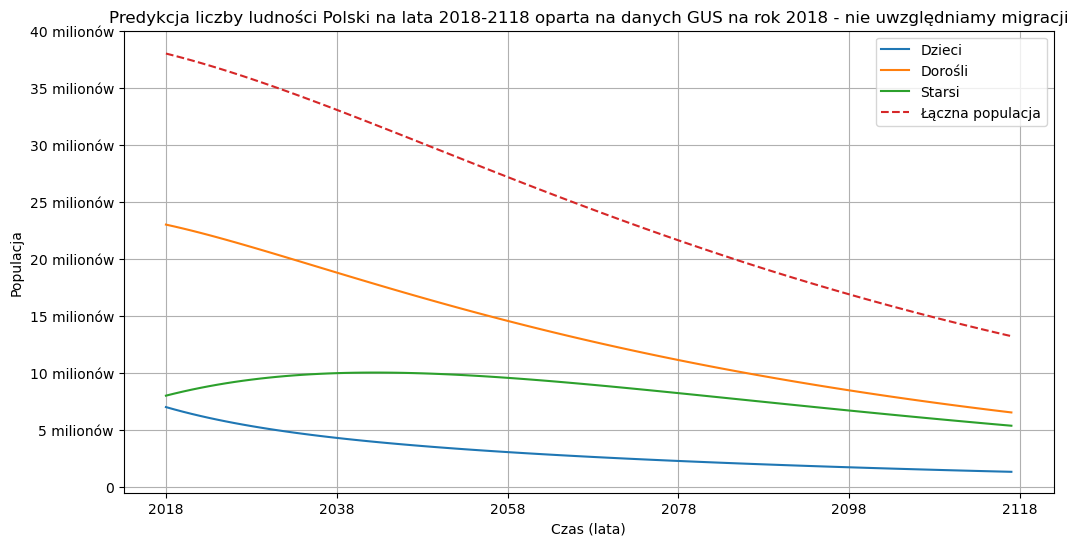

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Stałe modelu
b = 9.9 / 1000  # współczynnik urodzeń na 1000 osób rocznie
t_CA = 1 / 16  # współczynnik transferu dzieci do grupy dorosłych
t_AS = 1 / 47  # współczynnik transferu dorosłych do grupy starszych
d_A = 0.005     # współczynnik śmiertelności dla dorosłych
d_S = 0.038    # współczynnik śmiertelności dla starszych

# Początkowe wartości populacji
C = 7*10**6  # dzieci
A = 23*10**6  # dorośli
S = 8*10**6  # starsi

# Okres modelowania i krok czasowy
years = np.arange(0, 100, 1)  # 100 lat
dt = 1  # krok czasowy - 1 rok

# Listy do przechowywania wyników
C_values = [C]
A_values = [A]
S_values = [S]

# Obliczenia modelu
for _ in years[1:]:
    new_C = C + (b * A - t_CA * C) * dt
    new_A = A + (t_CA * C - t_AS * A - d_A * A) * dt
    new_S = S + (t_AS * A - d_S * S) * dt

    # Aktualizacja wartości na kolejny rok
    C, A, S = new_C, new_A, new_S

    # Dodawanie aktualnych wartości do list
    C_values.append(C)
    A_values.append(A)
    S_values.append(S)

# Obliczenie łącznej populacji
total_population = np.array(C_values) + np.array(A_values) + np.array(S_values)

# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.plot(years, C_values, label='Dzieci', color='tab:blue')
plt.plot(years, A_values, label='Dorośli', color='tab:orange')
plt.plot(years, S_values, label='Starsi', color='tab:green')
plt.plot(years, total_population, label='Łączna populacja', color='tab:red', linestyle='--')

plt.title('Predykcja liczby ludności Polski na lata 2018-2118 oparta na danych GUS na rok 2018 - nie uwzględniamy migracji')
plt.xlabel('Czas (lata)')
plt.xticks([0, 20, 40, 60, 80, 100], ['2018', '2038', '2058', '2078', '2098', '2118'])
plt.ylabel('Populacja')
plt.yticks([0, 5*10**6, 10**7, 1.5*10**7, 2*10**7,2.5*10**7, 3*10**7, 3.5*10**7, 4*10**7], 
['0', '5 milionów', '10 milionów', '15 milionów','20 milionów','25 milionów','30 milionów', '35 milionów', '40 milionów'])
plt.legend()
plt.grid()
plt.show()

# Ostatni model trzech grup wiekowych


## Oszacowanie liczby mieszkańców Berlina na przestrzeni następnych 50 lat, uwzględniono migrację

## Krótka charakterystyka problemu - Niemcy a migracja



Niemcy już od wielu lat zmagają się z napływem imigrantów z różnych części świata. Ich stolica jest jednym z najczęściej obieranych przez przybyszy kierunków i to właśnie na niej skupimy się w poniższej symulacji.

Na wykresie przedstawimy przewidywane zachowanie się liczby zarówno całej ludności, jak i samych imigrantów w czasie.

Przyjęliśmy, że rocznie do Berlina trafia około 10 tysięcy migrantów spoza Europy, a początkowa ich ilość to 70 tysięcy.


## Cel użycia tego modelu

Motywacją, żeby dobrać ten model do populacji Berlina było zbadanie, jak zachowają się w czasie różnice kulturowe. Po przeprowadzeniu symulacji widać, jak gwałtownie zanikają w wyniku wzrostu stosunku migrantów spoza Europy do Niemców.


## Praktyczne zastosowanie

Niemcom taki model mógłby przydać się do planowania polityki migracyjnej i podejmowaniu decyzji o relokacji. Tworzenie dzielnic dla imigrantów może mieć negatywne skutki. Nasi sąsiedzi radzą sobie jednak ze zjawiskiem migracji dość zaradnie.

## Dane

źródła danych: www.bamf.de; www.destatis.de; eurostat

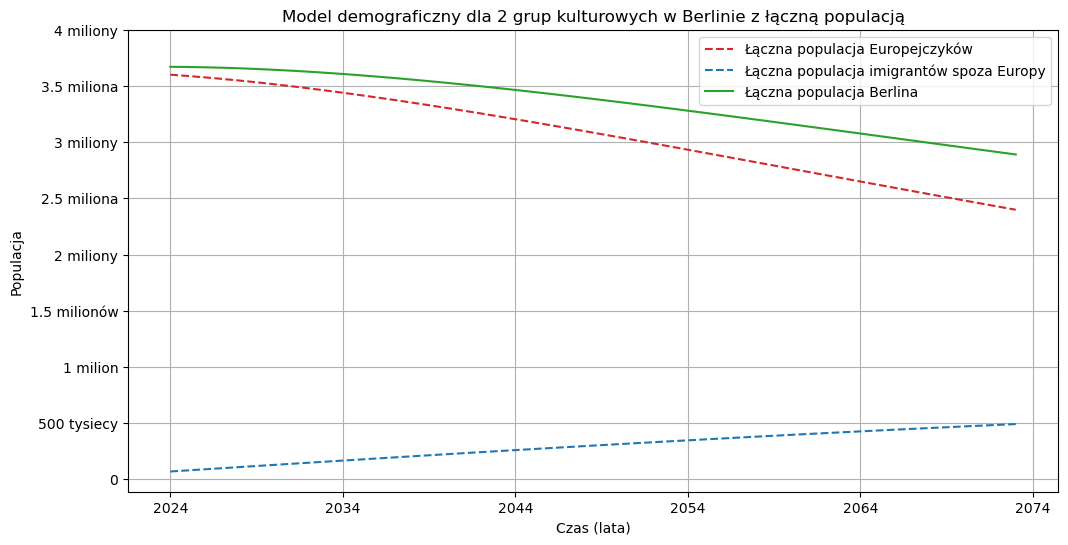

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Stałe modelu dla Niemców oraz imigrantów
b = 12 / 1000  # współczynnik urodzeń na 1000 osób rocznie
t_CA = 1 / 17  # współczynnik transferu dzieci do grupy dorosłych
t_AS = 1 / 43  # współczynnik transferu dorosłych do grupy starszych
d_A = 0.007    # współczynnik śmiertelności dla dorosłych
d_S = 0.035    # współczynnik śmiertelności dla starszych

b_I = 10/1000 # współczynnik urodzeń w potencjalnych krajach badanych migrantów to ok. 20/1000,
              # my weźmiemy połowę ponieważ zakładamy, że druga połowa potencjalnych dzieci urodzi się 
              # w związakch imigrantów i Europejczyków, przez co różnica kulturowa będzie zanikać 
               
# Początkowe wartości populacji dla mieszkańców Berlina (łącznie 3,6 miliona)
C_germans = 0.65 * 10**6  # dzieci
A_germans = 2.3 * 10**6   # dorośli
S_germans = 0.65 * 10**6  # starsi

# Początkowe wartości populacji dla imigrantów
C_imigrants = 15000  # dzieci (początkowo brak imigrantów)
A_imigrants = 45000  # dorośli (początkowo brak imigrantów)
S_imigrants = 10000  # starsi (początkowo brak imigrantów)
new_imigrants_yearly = 30000*0.333  # imigranci rocznie w Niemczech na przestrzeni ostatnich lat to ok. 1 000 000,
                                    # 50 000 z nich przybywa do Berlina ze stosunku ludności Berlina do całego kraju i ok 30% imigrantów jest spoza Europy
# Okres modelowania i krok czasowy
years = np.arange(0, 50, 1)  # 50 lat
dt = 1  # krok czasowy - 1 rok

# Listy do przechowywania wyników dla Niemców
C_germans_values = [C_germans]
A_germans_values = [A_germans]
S_germans_values = [S_germans]

# Listy do przechowywania wyników dla imigrantów
C_imigrants_values = [C_imigrants]
A_imigrants_values = [A_imigrants]
S_imigrants_values = [S_imigrants]

# Obliczenia modelu
for year in years[1:]:
    # Model dla Niemców
    new_C_germans = C_germans + (b * A_germans - t_CA * C_germans) * dt
    new_A_germans = A_germans + (t_CA * C_germans - t_AS * A_germans - d_A * A_germans) * dt
    new_S_germans = S_germans + (t_AS * A_germans - d_S * S_germans) * dt

    # Aktualizacja wartości dla Niemców
    C_germans, A_germans, S_germans = new_C_germans, new_A_germans, new_S_germans

    # Dodawanie aktualnych wartości do list dla Niemców
    C_germans_values.append(C_germans)
    A_germans_values.append(A_germans)
    S_germans_values.append(S_germans)

    # Model dla imigrantów
    # Każdego roku przybywa 50 000 imigrantów, w tym 30% spoza Europy, z czego 1/3 idzie do grupy dzieci, a reszta do grupy dorosłych
    new_C_imigrants = (b_I * A_imigrants - t_CA * C_imigrants + 1/3*new_imigrants_yearly) * dt 
    new_A_imigrants = (t_CA * C_imigrants - t_AS * A_imigrants - d_A * A_imigrants + 2/3*new_imigrants_yearly) * dt
    new_S_imigrants = (t_AS * A_imigrants - d_S * S_imigrants) * dt

    # Aktualizacja wartości dla imigrantów
    C_imigrants += new_C_imigrants
    A_imigrants += new_A_imigrants
    S_imigrants += new_S_imigrants

    # Dodawanie aktualnych wartości do list dla imigrantów
    C_imigrants_values.append(C_imigrants)
    A_imigrants_values.append(A_imigrants)
    S_imigrants_values.append(S_imigrants)

# Obliczenie łącznej populacji dla Niemców i imigrantów
total_population_germans = np.array(C_germans_values) + np.array(A_germans_values) + np.array(S_germans_values)
total_population_imigrants = np.array(C_imigrants_values) + np.array(A_imigrants_values) + np.array(S_imigrants_values)
total_population = np.array(total_population_germans) + np.array(total_population_imigrants)
                            
# Rysowanie wykresu
plt.figure(figsize=(12, 6))
# plt.plot(years, C_values, label='Dzieci', color='tab:blue')
# plt.plot(years, A_values, label='Dorośli', color='tab:orange')
# plt.plot(years, S_values, label='Starsi', color='tab:green')
plt.plot(years, total_population_germans, label='Łączna populacja Europejczyków', color='tab:red', linestyle='--')
plt.plot(years, total_population_imigrants, label='Łączna populacja imigrantów spoza Europy', color='tab:blue', linestyle='--')
plt.plot(years, total_population, label='Łączna populacja Berlina', color='tab:green')
plt.title('Model demograficzny dla 2 grup kulturowych w Berlinie z łączną populacją')
plt.xlabel('Czas (lata)')
plt.xticks([0, 10, 20, 30, 40, 50],['2015', '2025', '2035', '2045', '2055', '2065'])
plt.ylabel('Populacja')
plt.yticks([0, 0.5*10**6, 1*10**6, 1.5*10**6, 2*10**6,2.5*10**6, 3*10**6, 3.5*10**6, 4*10**6], 
           ['0', '500 tysiecy', '1 milion', '1.5 milionów','2 miliony','2.5 miliona','3 miliony','3.5 miliona','4 miliony'])
plt.legend()
plt.grid()
plt.show()


# Model logistyczny - populacja Tokio

## Model logistyczny jest jednym z popularnych narzędzi używanych do prognozowania dynamiki populacji.

W ogólności, model logistyczny opiera się na funkcji logistycznej, (krzywa logistyczna). 
W kontekście demografii, krzywa logistyczna może odzwierciedlać przewidywany wzrost populacji do pewnego punktu, 
po którym wzrost ten zwalnia, a populacja stabilizuje się na pewnym poziomie.

Charakter logistyczny populacji Tokio, czyli to, że jej wzrost osiągnie szczyt i stabilizuje się na pewnym poziomie, może być wpływany przez różnorodne czynniki. 
Poniżej przedstawiam kilka potencjalnych czynników, które mogą przyczynić się do kształtowania charakterystyki logistycznej populacji tego obszaru:

## 1. Niski wskaźnik urodzeń: 
Jeśli Tokio charakteryzuje się niskim wskaźnikiem urodzeń, to może prowadzić do ograniczenia naturalnego wzrostu populacji. 
Mniejsza liczba urodzeń może wynikać z różnych czynników, takich jak późne zakładanie rodzin, zwiększone koszty wychowania dzieci czy wyższy poziom edukacji kobiet, 
co często wpływa na decyzje prokreacyjne.

## 2. Stabilizacja poziomu zgonów: 
Jeżeli Tokio ma niski poziom śmiertelności dzięki dobrze rozwiniętemu systemowi opieki zdrowotnej i ogólnie zdrowemu stylowi życia ludności, 
to może to przyczynić się do osiągnięcia stabilności populacji. Niższa śmiertelność przyczyni się do dłuższego trwania życia ludzi, co wpływa na strukturę wiekową społeczeństwa.

## 3. Dostęp do edukacji: 
Wysoki poziom dostępu do edukacji może prowadzić do świadomych decyzji prokreacyjnych. 
Edukacja i świadomość zdrowotna mogą skłaniać mieszkańców do planowania rodziny i kontrolowania wielkości rodzin, co wpływa na tempo wzrostu populacji.

## 4. Rozwinięta infrastruktura i usługi społeczne: 
W przypadku, gdy Tokyo ma dobrze rozwiniętą infrastrukturę, usługi społeczne i dostęp do podstawowych potrzeb, 
ludzie mogą być bardziej skłonni do ograniczania liczby dzieci. Zapewnienie stabilnych warunków życia może wpływać na decyzje dotyczące rodziny.

## 5. Zmiany gospodarcze: 
Również czynniki gospodarcze, takie jak poziom zatrudnienia, dostępność miejsc pracy, czy sytuacja ekonomiczna, 
mogą wpływać na decyzje mieszkańców co do zakładania rodzin i liczby dzieci.

Warto zauważyć, że czynniki te mogą się wzajemnie przenikać i oddziaływać, tworząc kompleksową strukturę demograficzną. 
Populacja Tokyo, będąc jednym z największych i najbardziej rozwiniętych obszarów na świecie, może być pod wpływem wielu różnorodnych czynników, 
co może skutkować charakterystyką logistyczną jej populacji.


## Dane:

Niezbędne dane wzięliśmy ze strony : 
https://worldpopulationreview.com/world-cities/tokyo-population

**Model logistyczny populacji**


\begin{equation}
\frac{dP}{dt} = r \cdot P \cdot \left(1 - \frac{P}{K}\right)
\end{equation}


**Rozwiązanie równania różniczkowego**


Zaczynamy od rozdzielenia zmiennych


\begin{equation}
\frac{dP}{P \cdot \left(1 - \frac{P}{K}\right)} = r \cdot dt
\end{equation}


Następnie w lewej stronie równania wymnażamy nawias i cały ułamek rozszerzamy o K


\begin{equation}
\frac{K \cdot dP}{P \cdot (K - P)} = r \cdot dt
\end{equation}


Całkujemy obie strony równania


\begin{equation}
\int \frac{K}{P \cdot (K - P)} dP = \int r dt
\end{equation}


Rozłóżmy ułamek na sumę ułamków prostych


\begin{equation}
\int \left( \frac{A}{P} + \frac{B}{K - P} \right) dP = \int r dt
\end{equation}


Zapisujemy teraz równanie w postaci :
\begin{equation}
\int \left( \frac{1}{P} - \frac{1}{K - P} \right) dP = \int r dt
\end{equation}


Całkujemy obie strony, co daje nam:


\begin{equation}
\ln |P| - \ln |K - P| = rt + C
\end{equation}


$P$ oraz $K - P$ są zawsze dodatnie, więc opuszczamy wartość bezwzględną


\begin{equation}
\ln (P) - \ln (K - P) = rt + C
\end{equation}



Przekształcając otrzymujemy:


\begin{equation}
\ln \left( \frac{P}{K - P} \right) = rt + C
\end{equation}


A stąd:


\begin{equation}
\frac{P}{K - P} = e^{rt + C}
\end{equation}


Po przeprowadzeniu obliczeń:


\begin{equation}
P = \frac{K \cdot e^{rt + C}}{\left(1 + e^{rt + C}\right)}
\end{equation}


Teraz wyznaczymy stałą C, wiedząc, że początkowa populacja, czyli $P_0$ wynosi 11,275 miliona ludzi.


\begin{equation}
P(0) = \frac{K \cdot e^{C}}{1 + e^{C}} = 11.275 \cdot 10^6
\end{equation}


gdzie$ K = 40 \cdot 10^6 $

Podstawiając $ K $ i rozwiązując równanie dla $ C $ , otrzymujemy:
\begin{equation}
11.275 \cdot 10^6 = \frac{40 \cdot 10^6 \cdot e^{C}}{1 + e^{C}}
\end{equation}

Z tego równania możemy teraz rozwiązać dla \( C \):
\begin{equation}
e^{C} = \frac{11.275 \cdot 10^6}{40 \cdot 10^6 - 11.275 \cdot 10^6}
\end{equation}

\begin{equation}
C = \ln\left(\frac{11.275 \cdot 10^6}{40 \cdot 10^6 - 11.275 \cdot 10^6}\right)
\end{equation}

Po przeprowadzeniu obliczeń:
\begin{equation}
C \approx -0.935
\end{equation}











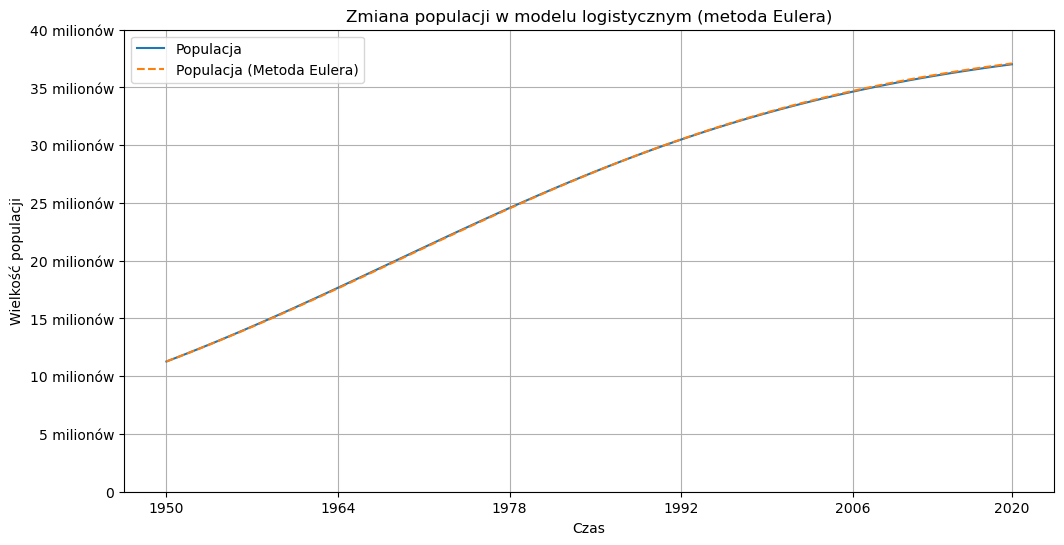

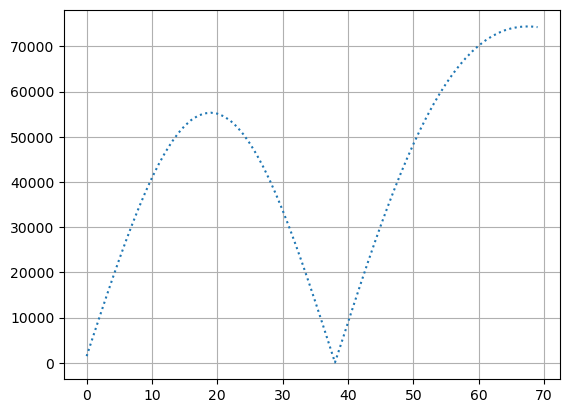

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parametry modelu
r = 0.05     # współczynnik wzrostu
K = 40 * 10**6 # pojemność środowiska wyjściowo miała być 37.5 miliona
P0 = 11.275*10**6    # początkowa wielkość populacji
T = 70     # całkowity czas symulacji
dt = 1      # krok czasowy

C=-0.935  
# Inicjalizacja
P = np.zeros(T)
P_a = np.zeros(T)
P[0] = P0
time = np.arange(0, T, dt)

# Symulacja przy użyciu metody Eulera
for t in range(1, T):
    dP = r * P[t-1] * (1 - P[t-1] / K)
    P[t] = P[t-1] + dP * dt

#Rozwiązanie analityczne dla każdego kroku czasowego

for t in range(0,T):
    P_a[t] = (K*math.e**(t/20+C))/(1+math.e**(t/20+C))#tu wyjściowo była 20 ale liczby się troche nie zgadzały
    
# Tworzenie wykresu

Blad = np.zeros(T)
for t in range(0,T):
    Blad[t] = abs(P_a[t]-P[t])
    

dt_values = [0.001, 0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.figure(figsize=(12,6))

plt.plot(time, P_a, label='Populacja')
plt.plot(time, P, label='Populacja (Metoda Eulera)', linestyle='dashed')

plt.xlabel('Czas')
plt.xticks([0, 14, 28, 42, 56, 69], ['1950', '1964', '1978', '1992', '2006', '2020'])
plt.ylabel('Wielkość populacji')
plt.yticks([0, 5*10**6, 10**7, 1.5*10**7, 2*10**7,2.5*10**7, 3*10**7, 3.5*10**7, 4*10**7], 
['0', '5 milionów', '10 milionów', '15 milionów','20 milionów','25 milionów','30 milionów', '35 milionów', '40 milionów'])
plt.title('Zmiana populacji w modelu logistycznym (metoda Eulera)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, Blad, label='Błąd', linestyle='dotted')
plt.grid()

